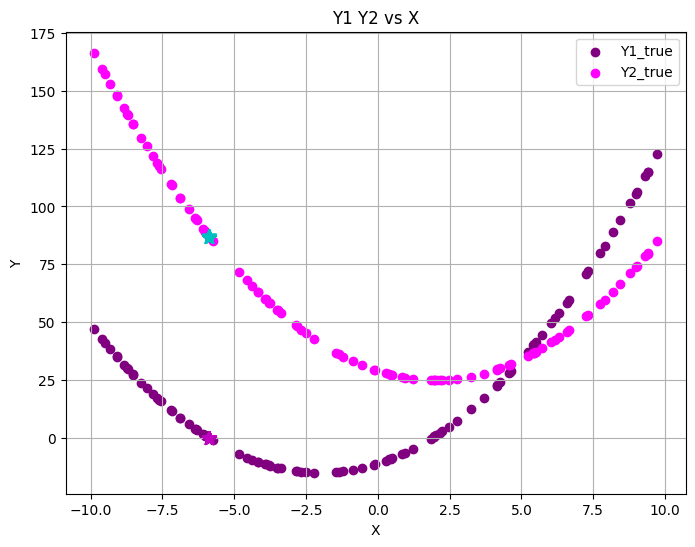

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random

# Generate synthetic dataset
np.random.seed(42)
X = np.random.uniform(-10, 10, size=(100,))
Y_true_1 = (X + 2) ** 2 - 15
Y_true_2 = (X - 2) ** 2 + 25

# Constants
DOMAIN = [-10, 10]
MAX_GENERATIONS = 95
PROB_MUTATE = 0.4
POP_SIZE = 105

class Individual:
    def __init__(self, id_, gene=None):
        self.id = id_
        if gene is None:
            self.gene = random.uniform(DOMAIN[0], DOMAIN[1])
        else:
            self.gene = gene
        self.fitness = None
        self.y1 = None
        self.y2 = None

    def mutate(self):
        if random.random() < PROB_MUTATE:
            perturbation = random.uniform(-1, 1)
            self.gene += perturbation

    def get_gene(self):
        return self.gene

    def crossover(self, other):
        gene = (self.get_gene() + other.get_gene()) * 0.5
        global ID
        new_ind = Individual(ID, gene)
        ID += 1
        return new_ind

    def evaluate(self):
        self.y1 = (self.gene + 2) ** 2 - 15
        self.y2 = (self.gene - 2) ** 2 + 25

    def show(self):
        print(self.gene)

def plotF():
    plt.figure(figsize=(8, 6))
    plt.title("Y1 Y2 vs X")
    plt.scatter(X, Y_true_1, color='purple', label='Y1_true')
    plt.scatter(X, Y_true_2, color='magenta', label='Y2_true')

ID = 0
def generatePopulation(n):
    global ID
    population = []
    for i in range(n):
        x = Individual(ID)
        ID += 1
        population.append(x)
    return population

population = generatePopulation(POP_SIZE)
num_offsprings = int(0.25 * len(population))

for generation in range(MAX_GENERATIONS + 1):
    new_pop = []

    for individual in population:
        individual.evaluate()

    population.sort(key=lambda x: (x.y1, x.y2))

    for individual in population:
        individual.fitness = 1 / individual.y1 + 1 / individual.y2

    population.sort(key=lambda x: x.fitness, reverse=True)

    if generation == MAX_GENERATIONS:
        break

    index = 0
    while len(new_pop) < num_offsprings:
        candidate = population[index]
        new_offspring = candidate.crossover(population[index + 1])
        new_offspring.mutate()
        new_pop.append(new_offspring)
        index += 2

    last = len(population) - len(new_pop)
    population = new_pop + population[:last]

plotF()

# Plot best solutions found
for i in range(num_offsprings):
    plt.plot(population[i].gene, population[i].y1, 'm*', markersize=10)
    plt.plot(population[i].gene, population[i].y2, 'c*', markersize=10)

plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.show()
